In [1]:
##########################################################################
# Created on Sat Nov 13 16:39:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 11.4.1.One step binomial tree

### Construct Binomial Tree

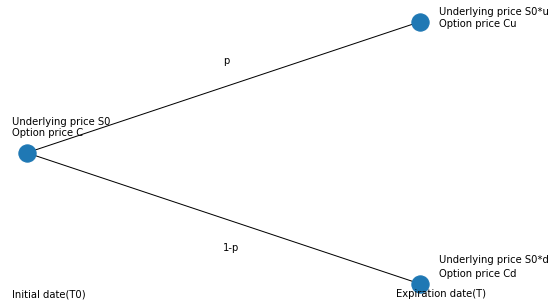

In [2]:
import utils
import matplotlib.pyplot as plt

plt.figtext(0.5,0.81,'p')
plt.figtext(0.5,0.16,'1-p')

plt.figtext(1.0,0.98,'Underlying price S0*u') 
plt.figtext(1.0,0.94,'Option price Cu') 
plt.figtext(1.0,0.12,'Underlying price S0*d') 
plt.figtext(1.0,0.07,'Option price Cd') 

plt.figtext(0.01,0.6,'Underlying price S0') 
plt.figtext(0.01,0.56,'Option price C') 

plt.figtext(0.01,0,'Initial date(T0)') 
plt.figtext(0.9,0,'Expiration date(T)') 
utils.binomial_grid(1)
plt.show()

### Mathematical expression

Risk free portfolio(Covered call)=long h stock+short one call option\
$$hS_0u-C_u=hS_0d-C_d\Rightarrow\tag{11-7}$$
$$h=\frac{C_u-C_d}{S_0u-S_0d}\tag{11-8}$$

PV of portfolio\
$$(hS_0u-C_u)e^{-rT}=hS_0-C\tag{11-9}$$
Substitute (11-8) to (11-9)
$$C=[pC_u+(1-p)C_d]e^{-rT}\tag{11-10}$$
where,\
$p=\frac{e^{rT}-d}{u-d}\to $Probability of rise\
$C_u=max(S_0u-K,0)$\
$C_d=max(S_0d-K,0)$

In [3]:
def BTM_1step(S,K,u,d,r,T,types):
    '''Define a function to calculate European option price using one step binomial tree.
    S:underlying price at t0
    K:strike price
    u:underlying price rise proportion
    d:underlying price down proportion
    r:risk free rate(continuous compound)
    T:tenor in year
    types:option type. 'call'indicates call option, otherwise put option'''
    from numpy import exp,maximum
    p=(exp(r*T)-d)/(u-d)
    Cu=maximum(S*u-K,0)
    Cd=maximum(S*d-K,0)
    call=(p*Cu+(1-p)*Cd)*exp(-r*T)
    put=call+K*exp(-r*T)-S
    if types=='call':
        value=call
    else:
        value=put
    return value

In [4]:
S_ICBC=6
K_ICBC=5.7
up=1.1
down=0.9
R=0.024
tenor=1.0

value_call=BTM_1step(S=S_ICBC,K=K_ICBC,u=up,d=down,r=R,T=tenor,types='call')
print('ICBC call option price is ',round(value_call,3))
value_put=BTM_1step(S=S_ICBC,K=K_ICBC,u=up,d=down,r=R,T=tenor,types='put')
print('ICBC put option price is ',round(value_put,3))

ICBC call option price is  0.546
ICBC put option price is  0.111


# 11.4.2.Two steps binomial tree

### Construct Binomial Tree

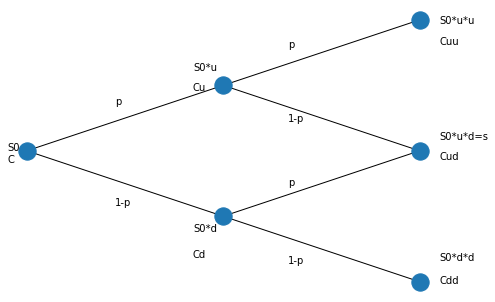

In [5]:
plt.figtext(0.25,0.66,'p')
plt.figtext(0.65,0.86,'p')
plt.figtext(0.65,0.38,'p')
plt.figtext(0.25,0.31,'1-p')
plt.figtext(0.65,0.6,'1-p')
plt.figtext(0.65,0.11,'1-p')

plt.figtext(1.0,0.94,'S0*u*u') 
plt.figtext(1.0,0.87,'Cuu') 
plt.figtext(1.0,0.54,'S0*u*d=s') 
plt.figtext(1.0,0.47,'Cud') 
plt.figtext(1.0,0.12,'S0*d*d') 
plt.figtext(1.0,0.04,'Cdd')

plt.figtext(0.43,0.78,'S0*u') 
plt.figtext(0.43,0.71,'Cu') 
plt.figtext(0.43,0.22,'S0*d') 
plt.figtext(0.43,0.13,'Cd')

plt.figtext(0,0.5,'S0') 
plt.figtext(0,0.46,'C') 
utils.binomial_grid(2)
plt.show()

### Mathematical expression

$$C_u=[pC_{uu}+(1-p)C_{ud}]e^{-r\Delta t}\tag{11-12}$$
$$C_d=[pC_{ud}+(1-p)C_{dd}]e^{-r\Delta t}\tag{11-13}$$
$$C=[pC_u+(1-p)C_d]e^{-r\Delta t}\tag{11-14}$$
Substitute (11-12) and (11-13) to (11-14),
$$C=\left[p^2C_{uu}+2p(1-p)C_{ud}+(1-p)^2C_{dd}\right]e^{-rT}\tag{11-15}$$
where,\
$T=2\Delta t$\
$p=\frac{e^{r \Delta t}-d}{u-d}\to $Probability of rise\
$C_uu=max(S_0u^2-K,0)$\
$C_ud=max(S_0ud-K,0)$\
$C_dd=max(S_0d^2-K,0)$

In [6]:
def BTM_2step(S,K,u,d,r,T,types):
    '''Define a function to calculate European option price using two steps binomial tree.
    S:underlying price at t0
    K:strike price
    u:underlying price rise proportion
    d:underlying price down proportion
    r:risk free rate(continuous compound)
    T:tenor in year
    types:option type. 'call'indicates call option, otherwise put option'''
    from numpy import exp,maximum
    t=T/2
    p=(exp(r*t)-d)/(u-d)
    Cuu=maximum(pow(u,2)*S-K,0)
    Cud=maximum(S*u*d-K,0)
    Cdd=maximum(pow(d,2)*S-K,0)
    call=(pow(p,2)*Cuu+2*p*(1-p)*Cud+pow(1-p,2)*Cdd)*exp(-r*T)
    put=call+K*exp(-r*T)-S
    if types=='call':
        value=call
    else:
        value=put
    return value

In [7]:
tenor_new=2

value_call_2Y=BTM_2step(S=S_ICBC,K=K_ICBC,u=up,d=down,r=R,T=tenor_new,types='call')
print('ICBC call option price is ',round(value_call_2Y,4))
value_put_2Y=BTM_2step(S=S_ICBC,K=K_ICBC,u=up,d=down,r=R,T=tenor_new,types='put')
print('ICBC put option price is ',round(value_put_2Y,4))

ICBC call option price is  0.6819
ICBC put option price is  0.1147


# 11.4.3.N steps binomial tree

### 1.Determine parameters u and d

Expectation of underlying stock return
$$E(X)=p(u-1)+(1-p)(d-1)\tag{11-16}$$
$$E(X^2)=p(u-1)^2+(1-p)(d-1)^2\tag{11-17}$$
Variation of underlying stock return
$$E(X^2)-[E(X)]^2=p(u-1)^2+(1-p)(d-1)^2-\left[p(u-1)+(1-p)(d-1)\right]^2\tag{11-18}$$
Institute $p=\frac{e^{r \Delta t}-d}{u-d}$ to (11-18),\
$$e^{r\Delta t}(u+d)-ud-e^{2r \Delta t}=\sigma ^2\Delta t\tag{11-19}$$

Using power series expansion \
$e^x=1+x+\frac{x^2}{2!}+\frac{x^3}{3!}\cdots$\
and ignore $(\Delta t)^2$ and higher power of $\Delta t$, we can get\
$$e^{r \Delta t}=1+r\Delta t\tag{11-20}$$
$$e^{2r \Delta t}=1+2r\Delta t\tag{11-21}$$
$$e^{\sigma\sqrt{\Delta t}}=1+\sigma\sqrt{\Delta t}+\frac{\sigma^2\Delta t}{2}+\frac{\sigma^3(\Delta t)^{\frac{3}{2}}}{6}\tag{11-22}$$
$$e^{-\sigma\sqrt{\Delta t}}=1-\sigma\sqrt{\Delta t}+\frac{\sigma^2\Delta t}{2}-\frac{\sigma^3(\Delta t)^{\frac{3}{2}}}{6}\tag{11-23}$$
Add (11-22) and (11-23), we can get\
$$\sigma^2\Delta t=e^{\sigma\sqrt{\Delta t}}+e^{-\sigma\sqrt{\Delta t}}-2\tag{11-24}$$
Substitute (11-20),(11-21) and (11-24) to (11-19), and ignore $r\Delta t$\
$$u+d-ud=e^{\sigma\sqrt{\Delta t}}+e^{-\sigma\sqrt{\Delta t}}-1\tag{11-25}$$
Finally, the expressions of parameters u and d can be obtained.\
$$u=e^{\sigma\sqrt{\Delta t}}\tag{11-26}$$
$$d=e^{-\sigma\sqrt{\Delta t}}=\frac{1}{u}\tag{11-27}$$

### 2.Mathematical expression

$$C=e^{-rT}\sum_{j=0}^N\frac{N!}{j!(N-j)!}p^j(1-p)^{N-j}C_{N,j}\tag{11-32}$$
where,\
$C_{N,j}=max\left(S_0u^jd^{N-j}-K,0\right)$\
$p=\frac{e^{r\Delta t}-d}{u-d}$\
$u=e^{\sigma \sqrt{\Delta t}}$\
$d=\frac{1}{u}$\
$\frac{N!}{j!(N-j)!}$:When the option expires, the price of the underlying asset is equal to a certain value, and the total number of paths can be realized in the binomial tree model

### 3.Implementation

In [8]:
def BTM_Nstep(S,K,sigma,r,T,N,types):
    '''Define a function to calculate European option price using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model
    types:option type. 'call'indicates call option, otherwise put option'''
    from math import factorial
    from numpy import exp,maximum,sqrt
    t=T/N
    u=exp(sigma*sqrt(t))
    d=1/u
    p=(exp(r*t)-d)/(u-d)
    N_list=range(0,N+1)
    A=[]
    for j in N_list:
        C_Nj=maximum(S*pow(u,j)*pow(d,N-j)-K,0)
        Num=factorial(N)/(factorial(j)*factorial(N-j))
        A.append(Num*pow(p,j)*pow(1-p,N-j)*C_Nj)
    call=exp(-r*T)*sum(A)
    put=call+K*exp(-r*T)-S
    if types=='call':
        value=call
    else:
        value=put
    return value

### 4.Case study

In [9]:
import pandas as pd
import numpy as np

P_ICBC=pd.read_excel('ICBC daily close price(2017-2019).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
R_ICBC=np.log(P_ICBC/P_ICBC.shift(1))
Sigma_ICBC=np.sqrt(252)*np.std(R_ICBC)
Sigma_ICBC=float(Sigma_ICBC)
print('Annualized volatility of ICBC is ',round(Sigma_ICBC,4))

Annualized volatility of ICBC is  0.2026


In [10]:
N_month=12
N_week=52
N_day=252

Call_value1=BTM_Nstep(S=S_ICBC,K=K_ICBC,sigma=Sigma_ICBC,r=R,T=tenor,N=N_month,types='call')
Call_value2=BTM_Nstep(S=S_ICBC,K=K_ICBC,sigma=Sigma_ICBC,r=R,T=tenor,N=N_week,types='call')
Call_value3=BTM_Nstep(S=S_ICBC,K=K_ICBC,sigma=Sigma_ICBC,r=R,T=tenor,N=N_day,types='call')

print('Call option price using 12 steps binomial tree is ',round(Call_value1,4))
print('Call option price using 52 steps binomial tree is ',round(Call_value2,4))
print('Call option price using 252 steps binomial tree is ',round(Call_value3,4))

Call option price using 12 steps binomial tree is  0.7245
Call option price using 52 steps binomial tree is  0.7152
Call option price using 252 steps binomial tree is  0.7156


### 5.Relationship between BSM and BTM

In [11]:
P_CCB=pd.read_excel('CCB daily close price(2018-20200818).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
R_CCB=np.log(P_CCB/P_CCB.shift(1))
Sigma_CCB=np.sqrt(252)*np.std(R_CCB)
Sigma_CCB=float(Sigma_CCB)
print('Annualized volatility of CCB is ',round(Sigma_CCB,4))

Annualized volatility of CCB is  0.2538


In [12]:
S_CCB=6.32
T_CCB=1
R_Aug18=0.0228
K_CCB=6.6

value_BSM=utils.option_BSM(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,opt='call')
print('CCB call option price using BSM is ',round(value_BSM,4))

CCB call option price using BSM is  0.5813


In [13]:
N1=10
N2=50
N3=250

value_BTM_N1=BTM_Nstep(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,N=N1,types='call')
value_BTM_N2=BTM_Nstep(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,N=N2,types='call')
value_BTM_N3=BTM_Nstep(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,N=N3,types='call')

print('CCB call option price using 10 steps binomial tree is ',round(value_BTM_N1,4))
print('CCB call option price using 50 steps binomial tree is ',round(value_BTM_N2,4))
print('CCB call option price using 250 steps binomial tree is ',round(value_BTM_N3,4))

CCB call option price using 10 steps binomial tree is  0.5899
CCB call option price using 50 steps binomial tree is  0.5841
CCB call option price using 250 steps binomial tree is  0.5818


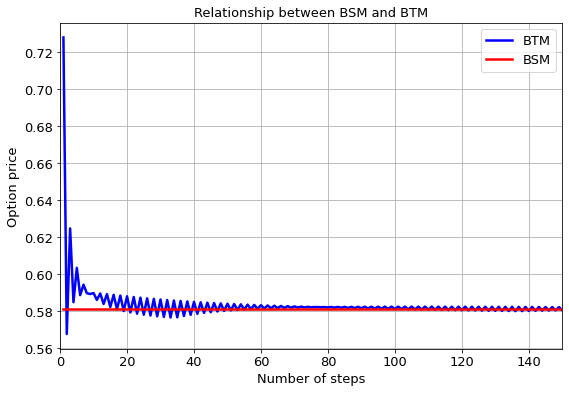

In [14]:
N_list=range(1,151)
value_BTM_list=np.zeros(len(N_list))
for i in N_list:
    value_BTM_list[i-1]=BTM_Nstep(S=S_CCB,K=K_CCB,sigma=Sigma_CCB,r=R_Aug18,T=T_CCB,N=i,types='call')
value_BSM_list=value_BSM*np.ones(len(N_list))

plt.figure(figsize=(9,6))
plt.plot(N_list,value_BTM_list,'b-',label='BTM',lw=2.5)
plt.plot(N_list,value_BSM_list,'r-',label='BSM',lw=2.5)
plt.xlabel('Number of steps',fontsize=13)
plt.xticks(fontsize=13)
plt.xlim(0,150)
plt.ylabel('Option price',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between BSM and BTM',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()